# Setup

## Bibliotecas

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rc = {"font.family": "serif",  # fonte serifada
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14
      "axes.axisbelow": True,  # grid abaixo dos dados
      "axes.grid": True, # grid por padrão
      
      "text.usetex": True, # latex em toda a figura
      }

%matplotlib inline

plt.rcParams.update(rc)


## Funções

In [174]:
def regressao_polinomial(x, y, deg=1, return_all=False):
    """
    - Retorna: 
      coeficientes, polinomio, regressão | regressao
    """
    coeficientes = np.polyfit(x, y, deg=deg)
    polinomio = np.poly1d(coeficientes)
    regressao = polinomio(x)
    return [coeficientes, polinomio, regressao] if return_all else regressao


def add_c_grid(ax, a1=0.5, a2=0.5):
    ax.minorticks_on()
    ax.grid(which='major', alpha=a1)
    ax.grid(which='minor', alpha=a2)


def add_sci_limits(ax, which='both', limits=(0, 0)):
    ax.ticklabel_format(
        axis=which,
        style='sci',
        useMathText=True,
        scilimits=limits)

def save_tab(tab, file, idx=False, header=True):
    tab.to_latex(
    buf=file,
    escape=False,
    index=idx,
    encoding='utf-8',
    header=header,
    column_format=len(tab.columns)*'c')

## Regressão manual

In [175]:
def reg_lin_manual(x, y, retorna_incerteza=False) -> list:
    '''
    Calcula os coeficientes da regressão linear calculada manualmente de x e y.

    # Retorna

    ## retorna_incerteza = False
     * [A, B, reg]

    ## retorna_incerteza = True
    * [A, B, reg, sigma_a, sigma_b]

    # Descrição do retorno:
    * A : Coeficiente linear
    * B: Coeficiente angular
    * reg: vetor de regeressão
    * sigma_a: incerteza de A
    * sigma_b: incerteza de B
    '''

    B = ((np.sum(x) * np.sum(y)) - (x.size * np.sum(x*y))) / \
        (np.sum(x)**2 - (x.size * np.sum(x**2)))

    A = (np.sum(y) - B * np.sum(x)) / (x.size)

    pol = np.poly1d([B, A])
    reg = pol(x)

    if retorna_incerteza:
        S = np.sum(np.power(y - reg, 2))
        den = (x.size * np.sum(x**2)) - (np.sum(x))**2

        sigma_a = S / ((x.size - 2) * np.sqrt(den))
        sigma_b = (S / (x.size - 2)) * np.sqrt(np.sum(x**2)/den)
        return [A, B, reg, sigma_a, sigma_b]

    return [A, B, reg]


# Parte 1

## Coleta dos dados

In [176]:
tab_1 = pd.DataFrame({'t': np.arange(0.0, 50.0, 10.0)})

tab_1['q1'] = [2.66, 0.87, 0.28, 0.09, 0.03]
tab_1['q2'] = [2.66, 0.85, 0.28, 0.09, 0.03]
tab_1['q3'] = [2.66, 0.86, 0.28, 0.09, 0.03]

tab_1['qm'] = (tab_1['q1'] + tab_1['q2'] + tab_1['q3']) / 3

tab_1['ln'] = np.log(tab_1['qm'])

tab_1


,t,q1,q2,q3,qm,ln
0,0.0,2.66,2.66,2.66,2.66,0.978326
1,10.0,0.87,0.85,0.86,0.86,-0.150823
2,20.0,0.28,0.28,0.28,0.28,-1.272966
3,30.0,0.09,0.09,0.09,0.09,-2.407946
4,40.0,0.03,0.03,0.03,0.03,-3.506558


## Linearização da expressão

In [190]:
A, B, reg, sigma_a, sigma_b = reg_lin_manual(
    x=tab_1['t'], y=tab_1['ln'], retorna_incerteza=True)

A, B, reg, sigma_a, sigma_b


(0.9733849620837493,
 -0.11226890759144464,
 array([ 0.97338496, -0.14930411, -1.27199319, -2.39468227, -3.51737134]),
 1.5109190061670183e-06,
 8.275644222409632e-05)

In [199]:
tau = 1/B
C = tau/5e12
epsilon = np.exp(A)*1e-12/C

tau, C, epsilon

(-8.907185626487776, -1.781437125297555e-12, -1.485816644072946)

In [203]:
eta_c = abs((-C - 1.77e-12)/1.77e-12)
eta_pilha = abs((-epsilon - 1.500)/1.500)

eta_c*100, eta_pilha*100

(0.6461652710483141, 0.9455570618036072)

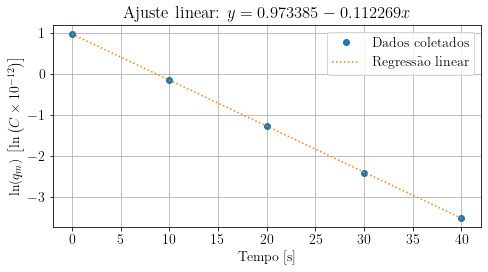

In [179]:
f, ax = plt.subplots(figsize=(7,4))

ax.plot(tab_1['t'], tab_1['ln'], 'o', label='Dados coletados')
ax.plot(tab_1['t'], reg, ':', label='Regressão linear')

ax.set(
    title=f'Ajuste linear: $y = ' f'{A:.6f}{B:.6f}x$',
    xlabel='Tempo [s]',
    ylabel=r'$\ln(q_m) \,\left[\ln\left(C\times 10^{-12}\right)\right]$'
)

ax.legend()

f.tight_layout()
f.savefig('carga-tempo.pdf')

# Parte 2

## Coleta dos dados

In [180]:
tab_2 = pd.DataFrame({'t': np.arange(0.0, 70.0, 10.0)})

tab_2['v1'] = [1.500, 0.489, 0.156, 0.051, 0.016, 0.005, 0.0002 ]
tab_2['v2'] = [1.500, 0.480, 0.157, 0.052, 0.017, 0.005, 0.0002 ]
tab_2['v3'] = [1.500, 0.485, 0.157, 0.050, 0.017, 0.005, 0.0002 ]


tab_2['vm'] = (tab_2['v1'] + tab_2['v2'] + tab_2['v3']) / 3

tab_2['ln'] = np.log(tab_2['vm'])

tab_2

,t,v1,v2,v3,vm,ln
0,0.0,1.5000,1.5000,1.5000,1.500000,0.405465
1,10.0,0.4890,0.4800,0.4850,0.484667,-0.724294
2,20.0,0.1560,0.1570,0.1570,0.156667,-1.853635
3,30.0,0.0510,0.0520,0.0500,0.051000,-2.975930
4,40.0,0.0160,0.0170,0.0170,0.016667,-4.094345
5,50.0,0.0050,0.0050,0.0050,0.005000,-5.298317
6,60.0,0.0002,0.0002,0.0002,0.000200,-8.517193


## Linearização da expressão

In [204]:
A, B, reg, sigma_a, sigma_b = reg_lin_manual(
    x=tab_2['t'], y=tab_2['ln'], retorna_incerteza=True)

A, B, reg, sigma_a, sigma_b


(0.7941857407906875,
 -0.13627404107797028,
 array([ 0.79418574, -0.56855467, -1.93129508, -3.29403549, -4.6567759 ,
        -6.01951631, -7.38225672]),
 0.003438740851257568,
 0.3280349701528472)

In [182]:
tau = 1/B
C = tau/5e12

tau, C

(-7.338154736512451, -1.4676309473024903e-12)

In [183]:
eta = abs(-C - 1.77e-12)/1.77e-12

eta*100

17.082997327542916

In [184]:
vpilha = np.exp(A)

eta_pilha = abs(vpilha - 1.500)/1.500
eta_pilha*100

47.509240115794896

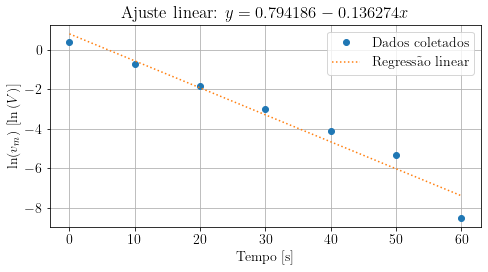

In [185]:
f, ax = plt.subplots(figsize=(7,4))

ax.plot(tab_2['t'], tab_2['ln'], 'o', label='Dados coletados')
ax.plot(tab_2['t'], reg, ':', label='Regressão linear')

ax.set(
    title=f'Ajuste linear: $y = ' f'{A:.6f}{B:.6f}x$',
    xlabel='Tempo [s]',
    ylabel=r'$\ln(v_m) \,\left[\ln\left(V\right)\right]$'
)

ax.legend()

f.tight_layout()
f.savefig('tensao-tempo.pdf')

# Relatório

In [186]:
tab_1_tex = tab_1.copy()

tab_1_tex.columns = [r'$t \pm 0.05$ [s]',
                 r'$q_1 \pm 0.005$ [pC]',
                 r'$q_2 \pm 0.005$ [pC]',
                 r'$q_3 \pm 0.005$ [pC]',
                 r'$q_m \pm sigma_{q_m}$ [pC]',
                 r'$\ln(q_m)$']

save_tab(tab_1_tex, './t1.tex', idx=False)
tab_1_tex

/tmp/ipykernel_5731/1010055959.py:26: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab.to_latex(


,$t \pm 0.05$ [s],$q_1 \pm 0.005$ [pC],$q_2 \pm 0.005$ [pC],$q_3 \pm 0.005$ [pC],$q_m \pm sigma_{q_m}$ [pC],$\ln(q_m)$
0,0.0,2.66,2.66,2.66,2.66,0.978326
1,10.0,0.87,0.85,0.86,0.86,-0.150823
2,20.0,0.28,0.28,0.28,0.28,-1.272966
3,30.0,0.09,0.09,0.09,0.09,-2.407946
4,40.0,0.03,0.03,0.03,0.03,-3.506558


In [187]:
tab_2_tex = tab_2.copy()

tab_2_tex.columns = [r'$t \pm 0.05$ [s]',
                 r'$v_1 \pm 0.0005$ [V]',
                 r'$v_2 \pm 0.0005$ [V]',
                 r'$v_3 \pm 0.0005$ [V]',
                 r'$v_m \pm sigma_{q_m}$ [V]',
                 r'$\ln(v_m)$']

save_tab(tab_2_tex, './t2.tex', idx=False)
tab_2_tex

/tmp/ipykernel_5731/1010055959.py:26: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab.to_latex(


,$t \pm 0.05$ [s],$v_1 \pm 0.0005$ [V],$v_2 \pm 0.0005$ [V],$v_3 \pm 0.0005$ [V],$v_m \pm sigma_{q_m}$ [V],$\ln(v_m)$
0,0.0,1.5000,1.5000,1.5000,1.500000,0.405465
1,10.0,0.4890,0.4800,0.4850,0.484667,-0.724294
2,20.0,0.1560,0.1570,0.1570,0.156667,-1.853635
3,30.0,0.0510,0.0520,0.0500,0.051000,-2.975930
4,40.0,0.0160,0.0170,0.0170,0.016667,-4.094345
5,50.0,0.0050,0.0050,0.0050,0.005000,-5.298317
6,60.0,0.0002,0.0002,0.0002,0.000200,-8.517193
